In [1]:
import lda
from scipy import sparse
import numpy as np
import json
import gensim 

unable to import 'smart_open.gcs', disabling that module


In [2]:
X_train = sparse.load_npz('/Users/tingchen/Desktop/Yelp Project/data_n_20_removed/X_train.npz')
cc= np.load("/Users/tingchen/Desktop/Yelp Project/data_n_20_removed/y_train.npy")

In [3]:
locs = []
with open("/Users/tingchen/Desktop/Yelp Project/locs_train.json", 'r') as file:
    locs = json.load(file)

In [4]:
ix = X_train.getnnz(1)>0
X_train = X_train[ix]
cc= cc[ix]
locs= np.array(locs)[ix]

In [5]:
model = lda.LDA(n_topics=25, n_regions = 3, n_iter=500)
model.fit_complete(X_train.astype(np.int32)[:20000], cc.astype(np.int32)[:20000], locs[:20000])

all zero column in document-term matrix found
/Users/tingchen/Desktop/Yelp_Cultural_Analysis/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):


Initialization 0
Initialization converged: True
[[[[  97   93   92   92   92   93   92   99   98   89  101  101   88
     109   98   93  107  100   92  103   95   89  100   95   93]
   [1287 1265 1260 1293 1271 1268 1296 1273 1268 1305 1261 1265 1306
    1278 1262 1299 1272 1252 1292 1283 1267 1286 1285 1268 1275]
   [1387 1373 1371 1409 1383 1371 1394 1376 1362 1386 1370 1365 1393
    1384 1380 1393 1377 1391 1393 1393 1390 1385 1381 1383 1379]]

  [[ 300  294  297  299  295  295  299  293  289  298  292  288  297
     300  280  303  298  295  303  297  294  298  296  296  300]
   [3612 3627 3628 3580 3641 3583 3577 3644 3619 3559 3677 3583 3566
    3667 3601 3580 3655 3600 3581 3622 3605 3596 3625 3624 3623]
   [1708 1685 1739 1719 1677 1738 1718 1683 1723 1727 1692 1716 1728
    1681 1706 1732 1682 1699 1727 1704 1707 1739 1698 1677 1737]]

  [[ 332  335  323  334  330  327  332  327  322  332  327  337  327
     327  333  335  322  321  333  328  324  327  327  332  324]
   [3606 3

In [5]:
model = lda.LDA(n_topics=25, n_iter=3000)
model.fit(X_train.astype(np.int32)[:30000], cc.astype(np.int32)[:30000])

all zero column in document-term matrix found
/Users/tingchen/Desktop/Yelp_Cultural_Analysis/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):


Finished initializing
0/3000
10/3000
20/3000
30/3000
40/3000
50/3000
60/3000
70/3000
80/3000
90/3000
100/3000
110/3000
120/3000
130/3000
140/3000
150/3000
160/3000
170/3000
180/3000
190/3000
200/3000
210/3000
220/3000
230/3000
240/3000
250/3000
260/3000
270/3000
280/3000
290/3000
300/3000
310/3000
320/3000
330/3000
340/3000
350/3000
360/3000
370/3000
380/3000
390/3000
400/3000
410/3000
420/3000
430/3000
440/3000
450/3000
460/3000
470/3000
480/3000
490/3000
500/3000
510/3000
520/3000
530/3000
540/3000
550/3000
560/3000
570/3000
580/3000
590/3000
600/3000
610/3000
620/3000
630/3000
640/3000
650/3000
660/3000
670/3000
680/3000
690/3000
700/3000
710/3000
720/3000
730/3000
740/3000
750/3000
760/3000
770/3000
780/3000
790/3000
800/3000
810/3000
820/3000
830/3000
840/3000
850/3000
860/3000
870/3000
880/3000
890/3000
900/3000
910/3000
920/3000
930/3000
940/3000
950/3000
960/3000
970/3000
980/3000
990/3000
1000/3000
1010/3000
1020/3000
1030/3000
1040/3000
1050/3000
1060/3000
1070/3000
1080/3000

In [6]:
dic = gensim.corpora.Dictionary.load("/Users/tingchen/Desktop/Yelp Project/big_lexicon_n_20_removed")

In [16]:
np.count_nonzero(model.nzwr_[: ,: ,0])

1331

In [20]:
np.unique(model.XS, return_counts=True)

(array([0, 1, 2], dtype=int32), array([639215, 192494, 169460]))

In [21]:
np.sum(model.nzwr_)

346722648.1999958

In [24]:
regions_locs = {i:[] for i in range(3)}

for i, reg in enumerate(list(model.RS)):
    regions_locs[reg].append(model.LS[i])

In [25]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [26]:
gdf_regions = {}

for key in regions_locs.keys():
    df = pd.DataFrame(regions_locs[key], columns= ['lat', 'long'])
    gdf_regions[key] = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.long, df.lat))

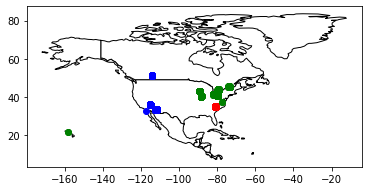

In [27]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')


colors= ['red', 'blue', 'green']

for key, val in gdf_regions.items():
    val.plot(ax=ax, color=colors[key])

plt.show()

1500 iterations

In [23]:
n_top_words = 15
n_regions=3
topic_word = model.topic_word_  
collection_word = model.topic_word_collection_ 
region_word = model.topic_word_region_ 

collections = ['Chinese', 'Italian', 'Mexican']

lexicon = np.array(list(dic.values()))

for i, topic_dist in enumerate(topic_word):
    topic_words = lexicon[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}\n'.format(i, ' '.join(topic_words)))
    
    collection_words = collection_word[i, :, :]
    
    for j, eth in enumerate(collections):
        topic_words = lexicon[np.argsort(collection_words[:, j])][:-n_top_words:-1]
        print('Cuisine {}: {}'.format(eth, ' '.join(topic_words)))
        
        
    region_words = region_word[i, :, :]
    
    for k in range(n_regions):
        topic_words = lexicon[np.argsort(region_words[:, k])][:-n_top_words:-1]
        print('region {}: {}'.format(k, ' '.join(topic_words)))
    print("\n")
    
    

Topic 0: really also ordered 've my they best menu try well delicious chicken 'm definitely

Cuisine Chinese: chinese rice soup fried noodles noodle little pork got egg dishes love sum meal
Cuisine Italian: pizza italian pasta salad cheese little love wine got meal crust staff wait family
Cuisine Mexican: tacos taco salsa burrito chips love got beans cheese rice asada meal carne margaritas
location 0: mexican always charlotte amazing everything shrimp area give side recommend sure better enjoyed beef
location 1: always amazing mexican vegas everything recommend sure beef shrimp awesome side meat bit area
location 2: always bit amazing beef everything recommend mexican side sure area quite meat shrimp give


Topic 1: music club dance loud dj floor hip band vip cool hop play nightclub dancing

Cuisine Chinese: fiji non-pretentious faded stamping streak british generically-named suprise pulse milk-based wut urn politics cheesecake
Cuisine Italian: hyde sinatra kathy austin pier minneapoli

Cuisine Italian: giftcard omnivore lpc lina coniglio hade annnndd haute goofy tramp costata kimberly roche hull
Cuisine Mexican: pupusas averaging illustrations flatten crunchwrap pesto 2-4-1 hit-or-miss sourness tostilocos slanted perceived 8.15 kit
location 0: mention holbert blister casse-croute ghettos home-team honker over-privileged pegao southies starship try.老板娘人超级好！味道很赞！很正宗的台湾小吃～ vietnamese/northern eucharist
location 1: partay sons despair suddenly cheesecake thetofu levinsky inspiring kylie obvious- sickeningly ebt cna entombed
location 2: tues corbos everrrrrrr 4.16 souvent prestis outrageously states rotd semi-heavy biteand starship vietnamese/northern eucharist


Topic 10: priced reasonably dimsum over sneak such paella entertainment moderately mind-blowing rocca awsome rings puking

Cuisine Chinese: american-chinese zhu back。 koreans aromatics did- elgant starship ghettos home-team honker over-privileged pegao southies
Cuisine Italian: leno half-empty froze montelucia pe

Cuisine Italian: oui pannini unorthodox neighborhoods landing/taking sparking stepping sketch fileto honeymoon lacklustre-generally kaboom guincale reveiw
Cuisine Mexican: receives cabra shrine mlts northing dewayne remebers shabbiness quasi-mexican biodegradable pickled​ conscientious burrito/bowl/tacos seafood
location 0: sauces columbian advising mt comprised 1extra drunk 91 holbert honker over-privileged pegao southies eucharist
location 1: cadillac delicatessen cee limon 2/taco deteriorated machuca assign dp devin attiude jar.but priceless convertino
location 2: lentils pierced sidetracked covering revamped admin future manly shiny well-portioned finished.i pittsburg finger/plate quesos


Topic 19: uber creek cave tim verdes healthy reserve hang filipino tons boulder bonterra prohibition sooooooo

Cuisine Chinese: goma location/signage boyd starters/snacks disappoints- ovaltine pre-chewed urged hk/guangdong prepared hippo iodine whimp ogle
Cuisine Italian: nikos underdoing sleepwa

1000 iterations

In [8]:
n_top_words = 15
topic_word = model.topic_word_  
collection_word = model.topic_word_collection_ 
collections = ['Chinese', 'Italian', 'Mexican']

lexicon = np.array(list(dic.values()))

for i, topic_dist in enumerate(topic_word):
    topic_words = lexicon[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}\n'.format(i, ' '.join(topic_words)))
    
    collection_words = collection_word[i, :, :]
    
    for i, eth in enumerate(collections):
        topic_words = lexicon[np.argsort(collection_words[:, i])][:-n_top_words:-1]
        print('Cuisine {}: {}'.format(eth, ' '.join(topic_words)))
    print("\n")

Topic 0: 2 give could eat first much made 'm reviews used stars actually probably ''

Cuisine Chinese: chicken rice fried ordered shrimp sauce egg beef soup order rolls chinese mein sour
Cuisine Italian: sandwich fries lunch chicken sandwiches burger beef meatball deli sub hot meat dry bread
Cuisine Mexican: asada fries carne burger torta jack burgers box roberto robertos del u sandwich na


Topic 1: cuervo recommending slamming jesus fudao excellent- mmm tinfoil 11 pk attentiveness utterly 1.5/5 quick

Cuisine Chinese: massage dig 4-6 sore pew luster seniors aroma bench arm slab definatly massages therapist
Cuisine Italian: bravo evo resturant craig ventano overrated biscotti obvious teeth soooo uno locate pleasure battle
Cuisine Mexican: airport flies fly flight sky arriba terminal kill 33 improved mothers layover harbor does


Topic 2: '' could come give my so way really got they 'm ordered make something

Cuisine Chinese: us came table order minutes asked wait went took said got se

Cuisine Italian: fazooli engagement oakville refrain delish shenanigans sarafino storm february frankie batalli valued vinegars chin
Cuisine Mexican: mountain pops volume overrated poke stressful to excessive slot sleep managing ear joe moral


Topic 20: soup noodles beef dishes pork noodle rice fried dumplings dish hot spicy sauce chinese

Cuisine Chinese: ordered also really try little 'm think could pretty '' first bit order much
Cuisine Italian: cremini across hunting ceasars ravioli- applebee windy principle luv decade pg reduced ramp bused
Cuisine Mexican: slow polished forever can fan fierce rely brownies leafy tracks deserts cooling mastercard full


Topic 21: salad pasta bread italian sauce pizza chicken cheese us fresh meatballs wine garlic spaghetti

Cuisine Chinese: royal mouth detox mars distributing insisting thailand vegans davidson dryer girlfriends unfamiliar theater toiletry
Cuisine Italian: really my much try ordered got also pretty come they '' think 've lunch
Cuisi